## explore_zillow

### Prepare environment

In [169]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.cluster import KMeans
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC


# data acquire/prepare imports
import acquire_zillow as acq
import acquire_mall as acq_mall
import prepare_zillow as prep_z
import prepare_mall as prep_mall

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Initial look at raw data

In [2]:
df_zillow_total = acq.all_zillow_data()
df_zillow_total.head(3)

,transactiondate,logerror,parcelid,airconditioningdesc,architecturalstyledesc,basementsqft,bathroomcnt,bedroomcnt,buildingclassdesc,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemdesc,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusedesc,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storydesc,threequarterbathnbr,typeconstructiondesc,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,2016-01-01,0.03,11016594,Central,None,nan,2.00,3.00,None,4.00,2.00,nan,nan,"1,684.00","1,684.00",nan,nan,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,Central,"34,280,990.00","-118,488,536.00","7,528.00",nan,nan,nan,nan,nan,0100,Single Family Residential,LARS,"60,371,066.46","12,447.00","3,101.00","31,817.00","96,370.00",0.00,None,nan,None,1.00,nan,nan,"1,959.00",nan,nan,"122,754.00","360,170.00","2,015.00","237,416.00","6,735.88",None,nan,"60,371,066,461,001.00"
1,2016-01-01,-0.17,14366692,None,None,nan,3.50,4.00,None,nan,3.50,nan,nan,"2,263.00","2,263.00",nan,nan,nan,nan,"6,059.00",nan,3.00,2.00,468.00,nan,None,"33,668,120.00","-117,677,556.00","3,643.00",nan,nan,nan,nan,nan,1,Single Family Residential,None,"60,590,524.22","32,380.00","1,286.00",nan,"96,962.00",0.00,None,1.00,None,nan,nan,nan,"2,014.00",nan,nan,"346,458.00","585,529.00","2,015.00","239,071.00","10,153.02",None,nan,nan
2,2016-01-01,-0.00,12098116,Central,None,nan,3.00,2.00,None,4.00,3.00,nan,nan,"2,217.00","2,217.00",nan,nan,nan,nan,"6,037.00",nan,3.00,nan,nan,nan,Central,"34,136,312.00","-118,175,032.00","11,423.00",nan,nan,nan,nan,nan,0100,Single Family Residential,PSR6,"60,374,638.00","47,019.00","3,101.00","275,411.00","96,293.00",0.00,None,nan,None,1.00,nan,nan,"1,940.00",nan,nan,"61,994.00","119,906.00","2,015.00","57,912.00","11,484.48",None,nan,"60,374,638,003,004.00"


In [3]:
df_zillow_total.shape

(167854, 60)

### Apply prepare.py changes:

In [4]:
df_zillow_total = prep_z.data_prep(df_zillow_total)
df_zillow_total

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock
0,2016-01-01,0.03,11016594,2.00,3.00,"1,684.00",6037.0,"34,280,990.00","-118,488,536.00",0100,12447.0,3101.0,96370.0,1959.0,"360,170.00","6,735.88",60371066461001.0
2,2016-01-01,-0.00,12098116,3.00,2.00,"2,217.00",6037.0,"34,136,312.00","-118,175,032.00",0100,47019.0,3101.0,96293.0,1940.0,"119,906.00","11,484.48",60374638003004.0
4,2016-01-02,-0.01,14432541,2.50,4.00,"2,283.00",6059.0,"33,485,643.00","-117,700,234.00",122,17686.0,1286.0,96961.0,1981.0,"434,551.00","5,488.96",60590423381006.0
5,2016-01-02,-0.27,11509835,4.00,4.00,"3,067.00",6037.0,"33,870,089.00","-118,402,768.00",0100,29712.0,3101.0,96109.0,1982.0,"2,447,951.00","27,126.57",60376210044006.0
6,2016-01-02,0.04,12286022,1.00,2.00,"1,297.00",6037.0,"33,899,475.00","-118,212,720.00",0100,24174.0,3101.0,96091.0,1939.0,"111,521.00","2,304.97",60375416053007.0
10,2016-01-03,0.38,10854446,2.00,2.00,"1,417.00",6037.0,"34,164,671.00","-118,477,995.00",0100,12447.0,3101.0,96426.0,1954.0,"105,954.00","1,443.69",60371414003003.0
11,2016-01-03,-0.02,11672170,4.00,5.00,"3,080.00",6037.0,"34,072,220.00","-118,547,322.00",0100,12447.0,3101.0,96120.0,1995.0,"1,090,127.00","13,428.94",60372626011017.0
12,2016-01-03,0.03,10949761,2.00,3.00,"1,484.00",6037.0,"34,189,804.00","-118,339,183.00",0100,396054.0,3101.0,96437.0,1944.0,"70,119.00",832.35,60373110001009.0
14,2016-01-03,-0.04,14148540,2.00,2.00,"1,367.00",6059.0,"33,913,333.00","-117,914,140.00",122,17150.0,1286.0,97035.0,1955.0,"254,817.00","3,192.28",60590015031046.0
15,2016-01-03,0.00,14057104,2.00,3.00,"1,302.00",6059.0,"33,676,787.00","-117,950,591.00",122,25218.0,1286.0,96964.0,1964.0,"345,023.00","4,036.32",60590992162013.0


In [5]:
df_zillow_total.shape

(110238, 17)

#### Maggies code for outliers... selects by column and lists the min and max boundaries to mark outliers.
#### Add this to the prepare.py... test it first!

In [6]:
keys = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet']
values = [(1,7), (1,7), (500,8000), (25000,2000000), (10000,2500000)]

dictionary = dict(zip(keys, values))

for key, value in dictionary.items():
    df_zillow_total = df_zillow_total[df_zillow_total[key] >= value[0]]
    df_zillow_total = df_zillow_total[df_zillow_total[key] <= value[1]]

In [7]:
df_zillow_total.shape

(109630, 17)

#### Now, create dummy columns on the FIPS (county identifier)

In [8]:
#create dummy columns on the FIPS
dummy = pd.get_dummies(df_zillow_total['fips'],prefix='fips')
df_zillow_total = pd.concat([df_zillow_total, dummy], axis=1)
df_zillow_total.head()

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0
0,2016-01-01,0.03,11016594,2.00,3.00,"1,684.00",6037.0,"34,280,990.00","-118,488,536.00",0100,12447.0,3101.0,96370.0,1959.0,"360,170.00","6,735.88",60371066461001.0,1,0,0
2,2016-01-01,-0.00,12098116,3.00,2.00,"2,217.00",6037.0,"34,136,312.00","-118,175,032.00",0100,47019.0,3101.0,96293.0,1940.0,"119,906.00","11,484.48",60374638003004.0,1,0,0
4,2016-01-02,-0.01,14432541,2.50,4.00,"2,283.00",6059.0,"33,485,643.00","-117,700,234.00",122,17686.0,1286.0,96961.0,1981.0,"434,551.00","5,488.96",60590423381006.0,0,1,0
5,2016-01-02,-0.27,11509835,4.00,4.00,"3,067.00",6037.0,"33,870,089.00","-118,402,768.00",0100,29712.0,3101.0,96109.0,1982.0,"2,447,951.00","27,126.57",60376210044006.0,1,0,0
6,2016-01-02,0.04,12286022,1.00,2.00,"1,297.00",6037.0,"33,899,475.00","-118,212,720.00",0100,24174.0,3101.0,96091.0,1939.0,"111,521.00","2,304.97",60375416053007.0,1,0,0


In [9]:
df_zillow_total.shape

(109630, 20)

In [10]:
fips_codes = ['fips_6037.0','fips_6059.0','fips_6111.0']
df_zillow_total[fips_codes].sum()

fips_6037.0    70689
fips_6059.0    29750
fips_6111.0     9191
dtype: int64

In [11]:
df_zillow_total.columns

Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0'], dtype='object')

#### Now, create an 'age' field by calculating against the 'yearbuilt' column:

In [12]:
df_zillow_total['age'] = 2017 - df_zillow_total.yearbuilt.astype(float)
df_zillow_total.head()

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0,age
0,2016-01-01,0.03,11016594,2.00,3.00,"1,684.00",6037.0,"34,280,990.00","-118,488,536.00",0100,12447.0,3101.0,96370.0,1959.0,"360,170.00","6,735.88",60371066461001.0,1,0,0,58.00
2,2016-01-01,-0.00,12098116,3.00,2.00,"2,217.00",6037.0,"34,136,312.00","-118,175,032.00",0100,47019.0,3101.0,96293.0,1940.0,"119,906.00","11,484.48",60374638003004.0,1,0,0,77.00
4,2016-01-02,-0.01,14432541,2.50,4.00,"2,283.00",6059.0,"33,485,643.00","-117,700,234.00",122,17686.0,1286.0,96961.0,1981.0,"434,551.00","5,488.96",60590423381006.0,0,1,0,36.00
5,2016-01-02,-0.27,11509835,4.00,4.00,"3,067.00",6037.0,"33,870,089.00","-118,402,768.00",0100,29712.0,3101.0,96109.0,1982.0,"2,447,951.00","27,126.57",60376210044006.0,1,0,0,35.00
6,2016-01-02,0.04,12286022,1.00,2.00,"1,297.00",6037.0,"33,899,475.00","-118,212,720.00",0100,24174.0,3101.0,96091.0,1939.0,"111,521.00","2,304.97",60375416053007.0,1,0,0,78.00


#### Now, peek at the newly prepared df:

In [13]:
look_zillow = prep_z.peekatdata(df_zillow_total)


 
 SHAPE:
(109630, 21)

 
 COLS:
Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age'], dtype='object')

 
 INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 109630 entries, 0 to 167887
Data columns (total 21 columns):
transactiondate                 109630 non-null object
logerror                        109630 non-null float64
parcelid                        109630 non-null object
bathroomcnt                     109630 non-null float64
bedroomcnt                      109630 non-null float64
calculatedfinishedsquarefeet    109630 non-null float64
fips                            109630 non-null object
latitude                        109630 non-null float64
longitude                       109630 

In [14]:
df_zillow_total.describe(include='all')

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0,age
count,109630,"109,630.00",109630,"109,630.00","109,630.00","109,630.00",109630,"109,630.00","109,630.00",109630,109630,109630,109630,109630,"109,630.00","109,630.00",109630,"109,630.00","109,630.00","109,630.00","109,630.00"
unique,607,nan,107825,nan,nan,nan,3,nan,nan,23,177,3,378,135,nan,nan,47019,nan,nan,nan,nan
top,2017-06-30,nan,14010551,nan,nan,nan,6037.0,nan,nan,0100,12447.0,3101.0,97319.0,1955.0,nan,nan,60590320231024.0,nan,nan,nan,nan
freq,787,nan,3,nan,nan,nan,70689,nan,nan,56192,24133,70689,1626,4001,nan,nan,55,nan,nan,nan,nan
mean,NaN,0.01,NaN,2.27,3.29,"1,885.41",NaN,"34,018,951.07","-118,190,865.23",NaN,NaN,NaN,NaN,NaN,"493,141.52","6,239.41",NaN,0.64,0.27,0.08,54.13
std,NaN,0.17,NaN,0.96,0.91,903.09,NaN,"271,890.95","355,006.44",NaN,NaN,NaN,NaN,NaN,"581,570.88","6,928.29",NaN,0.48,0.44,0.28,22.77
min,NaN,-4.66,NaN,1.00,1.00,500.00,NaN,"33,340,045.00","-119,475,265.00",NaN,NaN,NaN,NaN,NaN,"1,000.00",49.08,NaN,0.00,0.00,0.00,1.00
25%,NaN,-0.03,NaN,2.00,3.00,"1,267.00",NaN,"33,825,332.50","-118,394,566.25",NaN,NaN,NaN,NaN,NaN,"189,054.25","2,785.59",NaN,0.00,0.00,0.00,39.00
50%,NaN,0.01,NaN,2.00,3.00,"1,647.00",NaN,"34,019,618.00","-118,148,467.50",NaN,NaN,NaN,NaN,NaN,"360,000.00","4,675.16",NaN,1.00,0.00,0.00,57.00
75%,NaN,0.04,NaN,3.00,4.00,"2,263.00",NaN,"34,184,088.25","-117,928,060.50",NaN,NaN,NaN,NaN,NaN,"593,446.75","7,244.69",NaN,1.00,1.00,0.00,67.00


In [15]:
df_zillow_total.shape

(109630, 21)

In [16]:
#prep_z.check_missing_values_col(df_zillow_total)

In [17]:
df_zillow_total.columns

Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age'], dtype='object')

#### Now, scale the relevant numerical columns, ignoring other numerical columns that are essentially categorical in nature:

In [18]:
scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['logerror']])
df_zillow_total.logerror = scaler.transform(df_zillow_total[['logerror']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['bathroomcnt']])
df_zillow_total.bathroomcnt = scaler.transform(df_zillow_total[['bathroomcnt']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['bedroomcnt']])
df_zillow_total.bedroomcnt = scaler.transform(df_zillow_total[['bedroomcnt']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['calculatedfinishedsquarefeet']])
df_zillow_total.calculatedfinishedsquarefeet = scaler.transform(df_zillow_total[['calculatedfinishedsquarefeet']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['taxvaluedollarcnt']])
df_zillow_total.taxvaluedollarcnt = scaler.transform(df_zillow_total[['taxvaluedollarcnt']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['taxamount']])
df_zillow_total.taxamount = scaler.transform(df_zillow_total[['taxamount']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['latitude']])
df_zillow_total.latitude = scaler.transform(df_zillow_total[['latitude']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['longitude']])
df_zillow_total.longitude = scaler.transform(df_zillow_total[['longitude']])

scaler = MinMaxScaler()
scaler.fit(df_zillow_total[['age']])
df_zillow_total.age = scaler.transform(df_zillow_total[['age']])

In [19]:
# scaler = MinMaxScaler()
# num_vars = list(df_zillow_total.select_dtypes('number').drop(columns=['propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0']))

# print('Scaling {}, and {}...'.format(', '.join(num_vars[:-1]), num_vars[-1]))
# df_zillow_total[num_vars] = scaler.fit_transform(df_zillow_total[num_vars])

In [20]:
df_zillow_total.shape

(109630, 21)

In [21]:
df_zillow_total.head()

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0,age
0,2016-01-01,0.51,11016594,0.17,0.33,0.16,6037.0,0.64,0.52,0100,12447.0,3101.0,96370.0,1959.0,0.01,0.02,60371066461001.0,1,0,0,0.41
2,2016-01-01,0.51,12098116,0.33,0.17,0.23,6037.0,0.54,0.68,0100,47019.0,3101.0,96293.0,1940.0,0.00,0.04,60374638003004.0,1,0,0,0.55
4,2016-01-02,0.51,14432541,0.25,0.50,0.24,6059.0,0.10,0.93,122,17686.0,1286.0,96961.0,1981.0,0.02,0.02,60590423381006.0,0,1,0,0.25
5,2016-01-02,0.48,11509835,0.50,0.50,0.34,6037.0,0.36,0.56,0100,29712.0,3101.0,96109.0,1982.0,0.10,0.09,60376210044006.0,1,0,0,0.25
6,2016-01-02,0.51,12286022,0.00,0.17,0.11,6037.0,0.38,0.66,0100,24174.0,3101.0,96091.0,1939.0,0.00,0.01,60375416053007.0,1,0,0,0.56


In [22]:
df_zillow_total.describe(include='all')

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0,age
count,109630,"109,630.00",109630,"109,630.00","109,630.00","109,630.00",109630,"109,630.00","109,630.00",109630,109630,109630,109630,109630,"109,630.00","109,630.00",109630,"109,630.00","109,630.00","109,630.00","109,630.00"
unique,607,nan,107825,nan,nan,nan,3,nan,nan,23,177,3,378,135,nan,nan,47019,nan,nan,nan,nan
top,2017-06-30,nan,14010551,nan,nan,nan,6037.0,nan,nan,0100,12447.0,3101.0,97319.0,1955.0,nan,nan,60590320231024.0,nan,nan,nan,nan
freq,787,nan,3,nan,nan,nan,70689,nan,nan,56192,24133,70689,1626,4001,nan,nan,55,nan,nan,nan,nan
mean,NaN,0.51,NaN,0.21,0.38,0.19,NaN,0.46,0.67,NaN,NaN,NaN,NaN,NaN,0.02,0.02,NaN,0.64,0.27,0.08,0.39
std,NaN,0.02,NaN,0.16,0.15,0.12,NaN,0.18,0.19,NaN,NaN,NaN,NaN,NaN,0.02,0.02,NaN,0.48,0.44,0.28,0.17
min,NaN,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00
25%,NaN,0.50,NaN,0.17,0.33,0.10,NaN,0.33,0.57,NaN,NaN,NaN,NaN,NaN,0.01,0.01,NaN,0.00,0.00,0.00,0.28
50%,NaN,0.51,NaN,0.17,0.33,0.15,NaN,0.46,0.70,NaN,NaN,NaN,NaN,NaN,0.01,0.02,NaN,1.00,0.00,0.00,0.41
75%,NaN,0.51,NaN,0.33,0.50,0.24,NaN,0.57,0.81,NaN,NaN,NaN,NaN,NaN,0.02,0.02,NaN,1.00,1.00,0.00,0.48


#### View the distribution of the numeric variables

Plot a histogram of each variable.

Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

#### Histograms of all variables in dataframe:

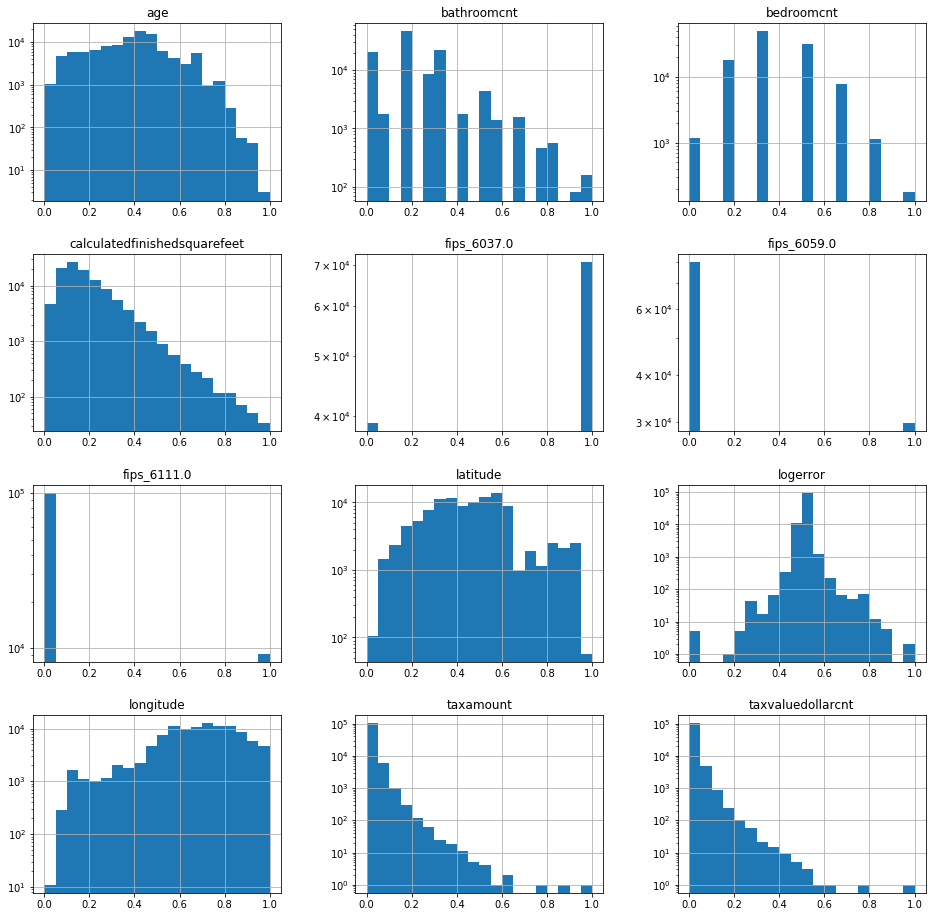

In [23]:
def zillow_hist(df):
    df_zillow_total.hist(figsize=(16,16), bins=20, log=True)
    plt.show()

zillow_hist(df_zillow_total)

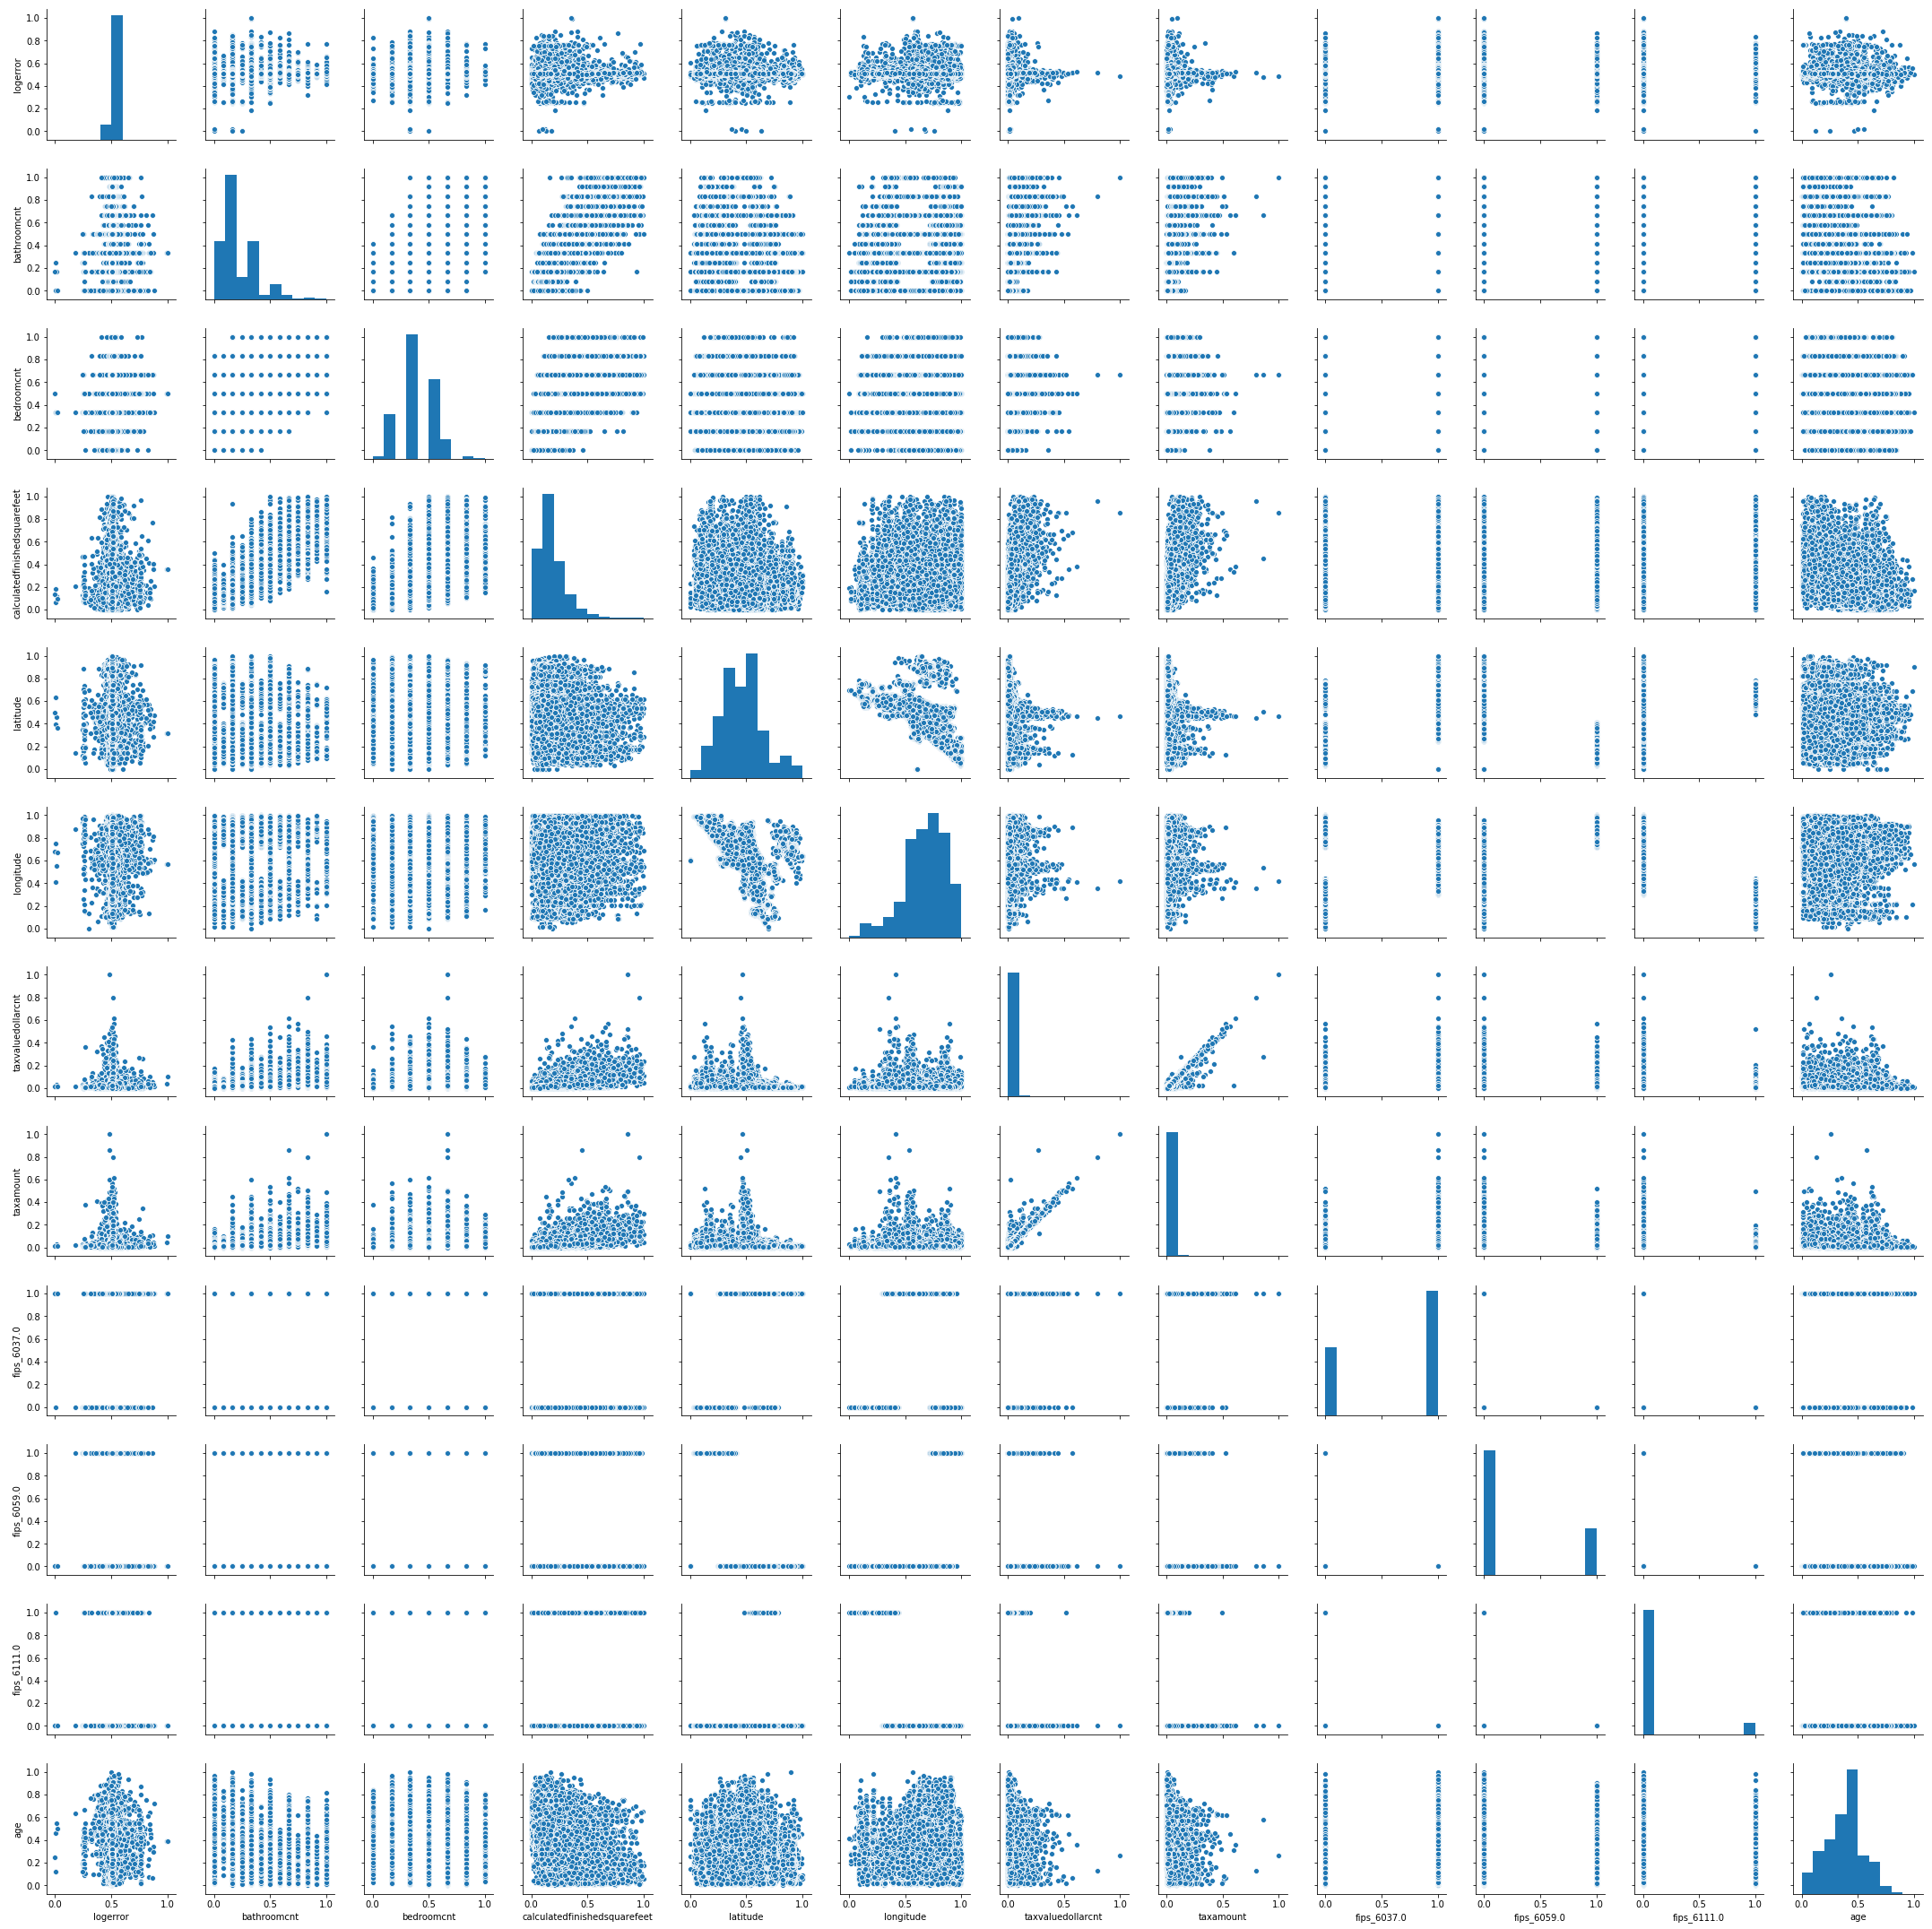

In [24]:
import seaborn as sns

def zillow_pair(df):
    sns.pairplot(df_zillow_total.select_dtypes('number'))

zillow_pair(df_zillow_total)

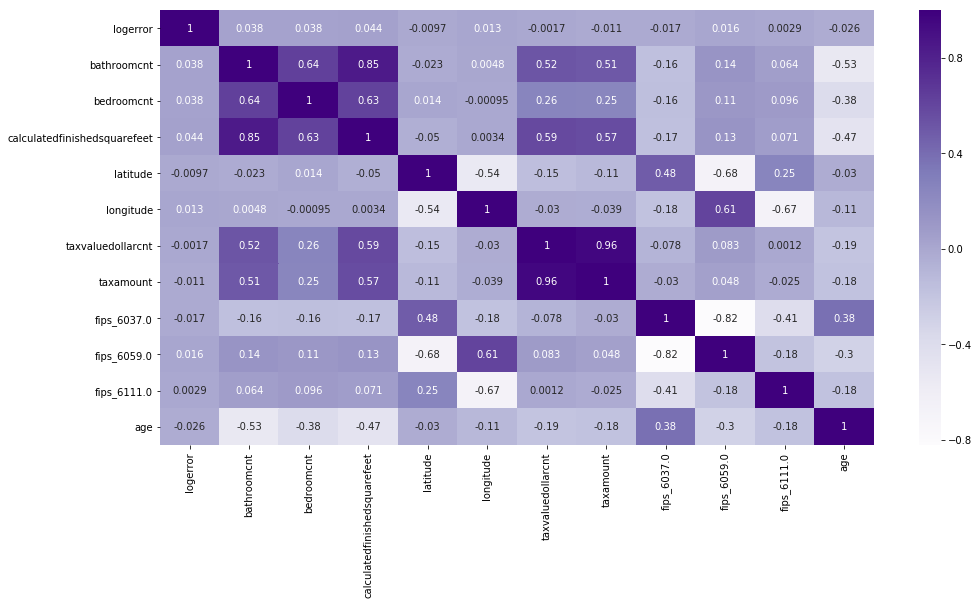

In [25]:
def zillow_heat(df):
    plt.figure(figsize=(16,8))
    sns.heatmap(df.corr(), cmap='Purples', annot=True)

zillow_heat(df_zillow_total)

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


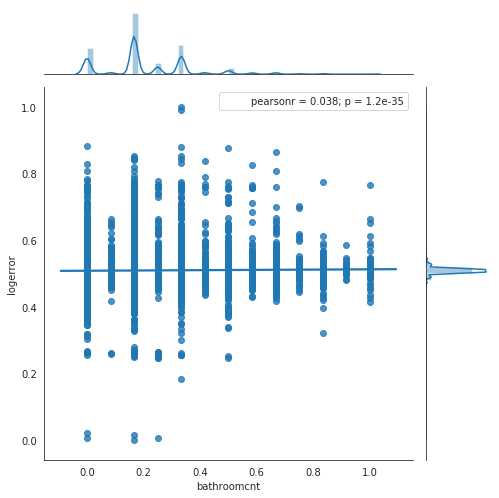

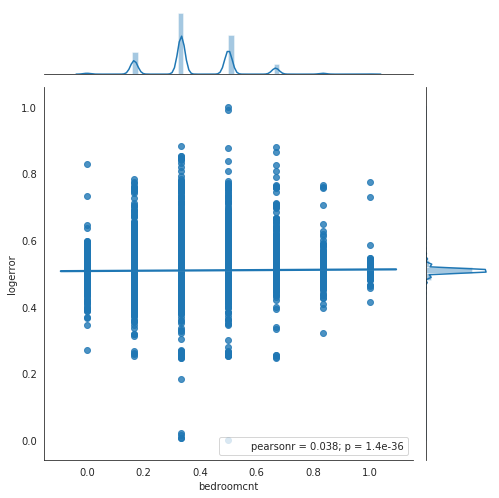

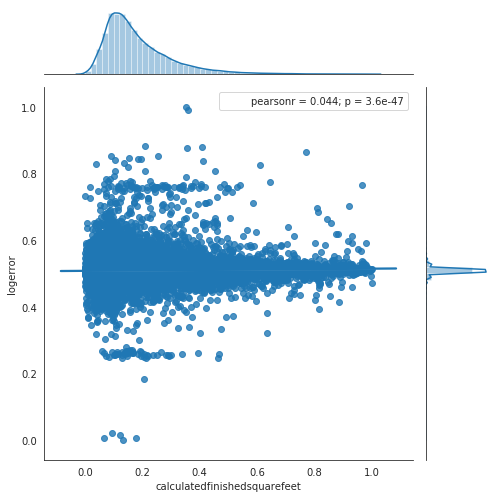

In [26]:
def zillow_joint(df):
    for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']):
        with sns.axes_style('white'):
            plot_number = i + 1
            series = df[col]
            j = sns.jointplot(df[col], 'logerror', data=df, kind='reg', height=7)
            j.annotate(stats.pearsonr)
    plt.show

zillow_joint(df_zillow_total)

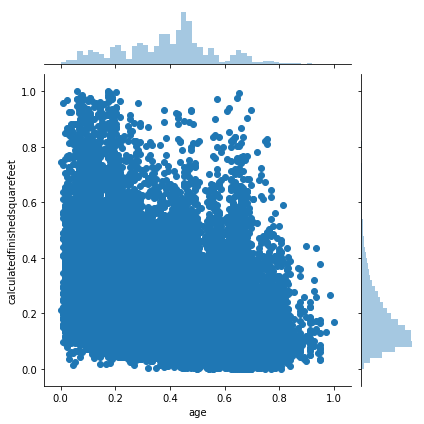

In [27]:
def zillow_sq_ft_age(df):
    sns.jointplot(x="age", y="calculatedfinishedsquarefeet", data=df_zillow_total)
    plt.show
    
zillow_sq_ft_age(df_zillow_total)

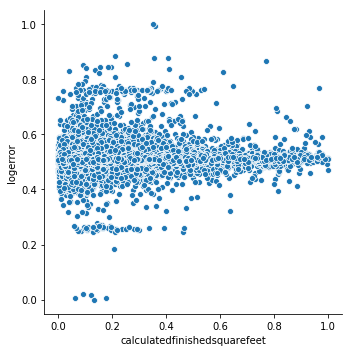

In [28]:
def zillow_sq_ft_error(df):
    sns.relplot(x='calculatedfinishedsquarefeet', y='logerror', data=df_zillow_total)
    plt.show
    
zillow_sq_ft_error(df_zillow_total)

### Clustering

Clustering with logerror only:

In [29]:
X = df_zillow_total[['logerror']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 11):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 11), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

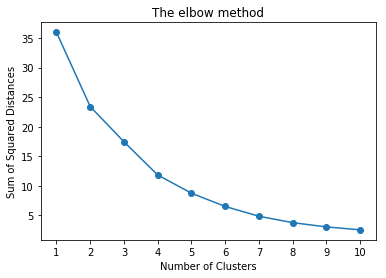

In [30]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

This means that things flatten out at about 4 clusters.  Use 4 clusters going forward.

Another elbow method looking at a cluster of sq ft and tax valuation.

In [31]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

intertias = []
for the_number_of_clusters_in_this_iterations in range(1, 15):
    kmeans = KMeans(n_clusters=the_number_of_clusters_in_this_iterations)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)
    
kmeans_perf = pd.DataFrame(list(zip(range(1, 15), intertias)), columns=['n_clusters', 'ssd'])

Text(0.5, 1.0, 'The elbow method')

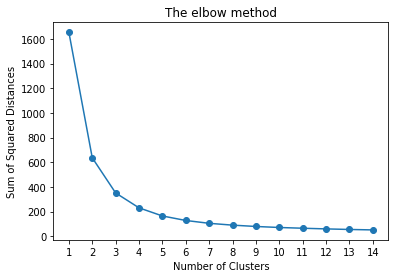

In [32]:
plt.scatter(kmeans_perf.n_clusters, kmeans_perf.ssd)
plt.plot(kmeans_perf.n_clusters, kmeans_perf.ssd)

plt.xticks(range(1, 15))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The elbow method')

#### Another cluster, done manually

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

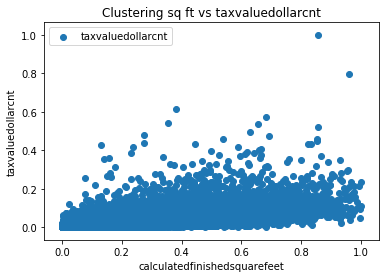

In [33]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
plt.scatter(X.calculatedfinishedsquarefeet, X.taxvaluedollarcnt)
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

Setting the starting points for the clusters to center around.  These are the 'centers.'

In [34]:
starting_points = [(.2, .2), (.4, .2), (.6, .4), (.8, .6)]

centers = pd.DataFrame(starting_points, columns=['calculatedfinishedsquarefeet', 'taxvaluedollarcnt'])
centers

,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,0.20,0.20
1,0.40,0.20
2,0.60,0.40
3,0.80,0.60


Now adding the cluster marks on the scatter plot

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

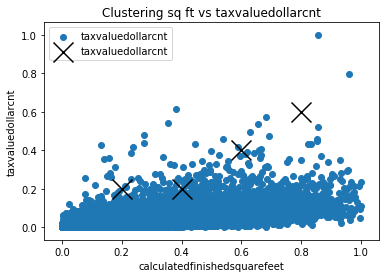

In [35]:
plt.scatter(X.calculatedfinishedsquarefeet, X.taxvaluedollarcnt)
plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, marker='x', s=400, c='black')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

Calculating distances, and returning nearest center for each point

In [36]:
# ======================================================================== #
# Note this doesn't print anything to the screen. Move on to the next cell.
# ======================================================================== #

def distance(x, y):
    '''distance between x and y'''
    return math.sqrt((x.calculatedfinishedsquarefeet - y.calculatedfinishedsquarefeet)**2 +
                     (x.taxvaluedollarcnt - y.taxvaluedollarcnt)**2)
    
def find_cluster(row: pd.Series):
    '''takes a data point, and returns the nearest center'''
    distances = centers.apply(lambda center: distance(center, row), axis=1)
    return distances.idxmin()


# ======================================================================== #
# Note this doesn't print anything to the screen. Move on to the next cell.
# ======================================================================== #

In [37]:
X['cluster'] = X.apply(find_cluster, axis=1)
X.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt,cluster
0,0.16,0.01,0
2,0.23,0.00,0
4,0.24,0.02,0
5,0.34,0.10,1
6,0.11,0.00,0


Counts of the data points in relation to the chosen four (4) centers.

In [38]:
X.cluster.value_counts()

0    94100
1    14924
2      589
3       17
Name: cluster, dtype: int64

Now plotting that in color:

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

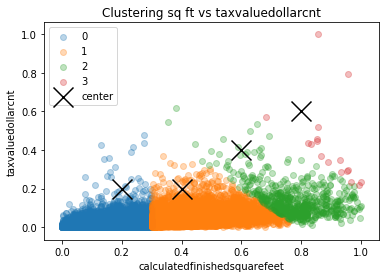

In [39]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

Now RE-center the centers of the clusters, based on mean:

In [40]:
centers = X.groupby('cluster').mean()

Now RE-adjusting the clusters based on the new mean-based centers:

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

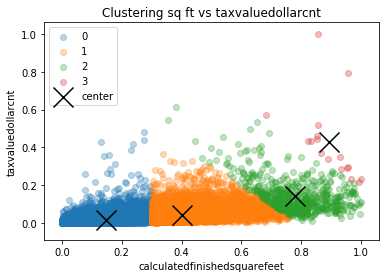

In [41]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

Now, repeating this process multiple times, to re-center the center of clusters, and then readjusting the clusters around the new centers.

In [42]:
centers = X.groupby('cluster').mean()

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

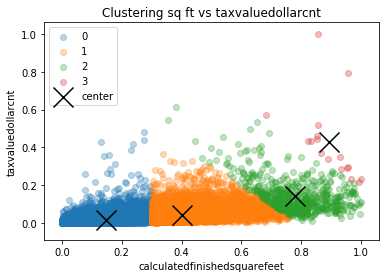

In [43]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

In [44]:
centers = X.groupby('cluster').mean()

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

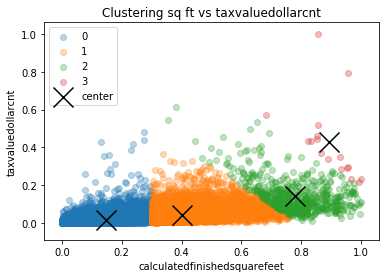

In [45]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

In [46]:
centers = X.groupby('cluster').mean()

Text(0.5, 1.0, 'Clustering sq ft vs taxvaluedollarcnt')

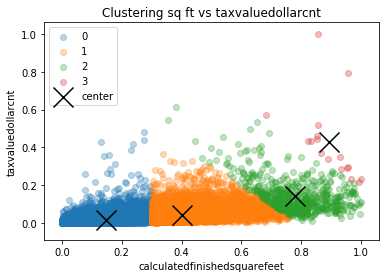

In [47]:
for cluster in X.cluster.unique():
    this_cluster = X[X.cluster == cluster]
    plt.scatter(this_cluster.calculatedfinishedsquarefeet, this_cluster.taxvaluedollarcnt, label=cluster, alpha=.3)

plt.scatter(centers.calculatedfinishedsquarefeet, centers.taxvaluedollarcnt, s=400, marker='x', c='black', label='center')
plt.legend()
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxvaluedollarcnt')
plt.title('Clustering sq ft vs taxvaluedollarcnt')

That was all manual.  Now, this process is done automatically, using:

In [48]:
from sklearn.cluster import KMeans

The X below is a df based on just the log error field.

The KMeans object is created, and that df is split into 4 clusters. Those clusters are fit to KMeans model.

A new field is created in the df based on the KMeans prediction of those clusters.

Finally, the primary df is ploted in a relplot, specifically, the two fields shown as x and y, with respect to those clusters.  This looks at the correlation of the two fields with respect to the clusters, in this case the logerror.

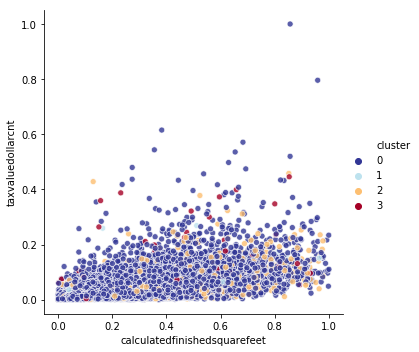

In [49]:
X = df_zillow_total[['logerror']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', hue='cluster', palette='RdYlBu_r', alpha=.8)

Another clustering, this time using sq ft and tax valuation, looking at correlation of tax valuation and sq ft.

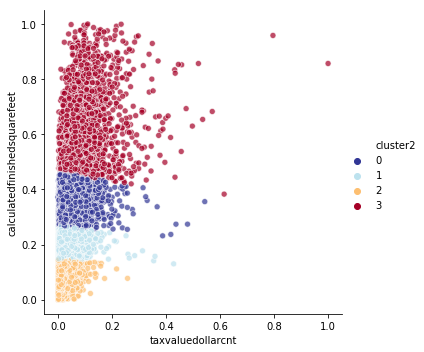

In [50]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster2'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='taxvaluedollarcnt', y='calculatedfinishedsquarefeet', hue='cluster2', palette='RdYlBu_r', alpha=.7)

In [51]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
#pd.DataFrame(kmeans.cluster_centers_, columns=X.drop(columns='cluster2').columns)

,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,0.33,0.03
1,0.20,0.02
2,0.10,0.01
3,0.58,0.08


In [52]:
kmeans.inertia_

229.81389171580204

In [53]:
X.head()

,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,0.16,0.01
2,0.23,0.00
4,0.24,0.02
5,0.34,0.10
6,0.11,0.00


Another cluster, based on sq ft and tax valuation, looking at correlation of bathroomcnt and logerror.

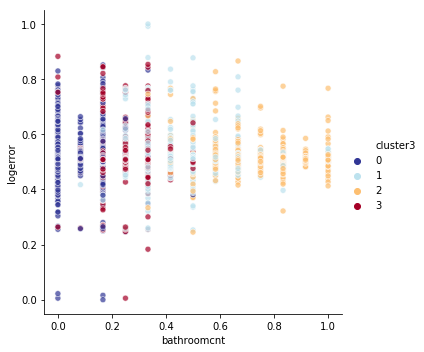

In [54]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster3'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='bathroomcnt', y='logerror', hue='cluster3',palette='RdYlBu_r', alpha=.7)

Another cluster, build on sq ft and tax valuation, looking at age and logerror.

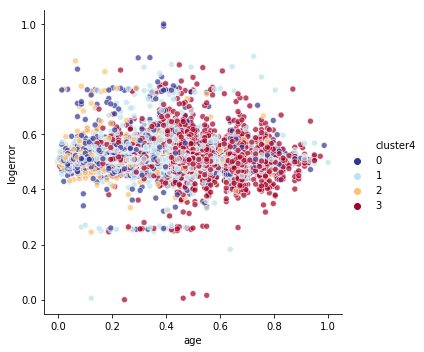

In [55]:
X = df_zillow_total[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster4'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='age', y='logerror', hue='cluster4', palette='RdYlBu_r', alpha=.7)

Another cluster, using lat and long, considering correlation of age and tax valuation:

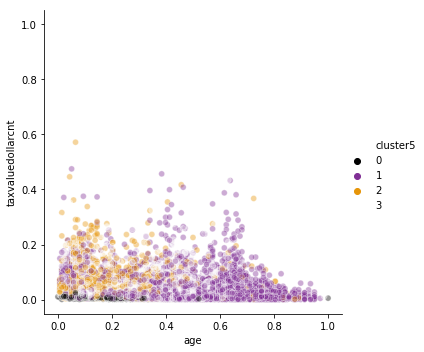

In [154]:
X = df_zillow_total[['latitude', 'longitude']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df_zillow_total['cluster5'] = kmeans.predict(X)

sns.relplot(data=df_zillow_total, x='age', y='taxvaluedollarcnt', hue='cluster5', palette='CMRmap', alpha=.4)

In [57]:
df_zillow_total.head()

,transactiondate,logerror,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,propertycountylandusecode,regionidcity,regionidcounty,regionidzip,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock,fips_6037.0,fips_6059.0,fips_6111.0,age,cluster,cluster2,cluster3,cluster4,cluster5
0,2016-01-01,0.51,11016594,0.17,0.33,0.16,6037.0,0.64,0.52,0100,12447.0,3101.0,96370.0,1959.0,0.01,0.02,60371066461001.0,1,0,0,0.41,0,1,3,1,3
2,2016-01-01,0.51,12098116,0.33,0.17,0.23,6037.0,0.54,0.68,0100,47019.0,3101.0,96293.0,1940.0,0.00,0.04,60374638003004.0,1,0,0,0.55,0,1,3,1,0
4,2016-01-02,0.51,14432541,0.25,0.50,0.24,6059.0,0.10,0.93,122,17686.0,1286.0,96961.0,1981.0,0.02,0.02,60590423381006.0,0,1,0,0.25,0,1,3,1,2
5,2016-01-02,0.48,11509835,0.50,0.50,0.34,6037.0,0.36,0.56,0100,29712.0,3101.0,96109.0,1982.0,0.10,0.09,60376210044006.0,1,0,0,0.25,0,0,1,0,0
6,2016-01-02,0.51,12286022,0.00,0.17,0.11,6037.0,0.38,0.66,0100,24174.0,3101.0,96091.0,1939.0,0.00,0.01,60375416053007.0,1,0,0,0.56,0,2,0,3,0


#### Perform at least 1 t-test and 1 chi square test.

Personal note re R^2:

Need:

R^2 greater than .5;  -  ie in one example, "92.1% of the variance in dependent variable is explained by the independent variable."



Also re Pearson's R:  "Pearson's R is __ with a significance p-value of __"


As a yardstick, REMEMBER:

R square > .5 (or "50%"),

F stat significance < 0.05

p value < 0.05

If all true, this is a good fit and THESE RESULTS ARE RELIABLE.

In [58]:
df_zillow_total.columns

Index(['transactiondate', 'logerror', 'parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude', 'propertycountylandusecode', 'regionidcity', 'regionidcounty', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount', 'censustractandblock', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5'], dtype='object')

In [59]:
pd.crosstab(df_zillow_total["regionidcounty"], df_zillow_total["fips"], margins=True)

fips,6037.0,6059.0,6111.0,All
regionidcounty,,,,
1286.0,0,29750,0,29750
2061.0,0,0,9191,9191
3101.0,70689,0,0,70689
All,70689,29750,9191,109630


In [60]:
tbl = pd.crosstab(df_zillow_total["regionidcounty"], df_zillow_total["fips"])
stat, p, dof, expected = stats.chi2_contingency(tbl)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)

Dependent (reject H0)
0.0


In [61]:
pd.crosstab(df_zillow_total["cluster4"], df_zillow_total["fips"], margins=True)

fips,6037.0,6059.0,6111.0,All
cluster4,,,,
0,9030,6301,1921,17252
1,22041,11258,3705,37004
2,2128,1465,451,4044
3,37490,10726,3114,51330
All,70689,29750,9191,109630


In [62]:
tbl = pd.crosstab(df_zillow_total["cluster4"], df_zillow_total["fips"])
stat, p, dof, expected = stats.chi2_contingency(tbl)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)

Dependent (reject H0)
0.0


In [63]:
tbl = pd.crosstab(df_zillow_total["cluster4"], df_zillow_total["logerror"])
stat, p, dof, expected = stats.chi2_contingency(tbl)
prob = .95
critical = stats.chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
print(p)

Dependent (reject H0)
3.3531190278028167e-13


pearson's r

In [64]:
r, pval = stats.pearsonr(df_zillow_total.latitude, df_zillow_total.bathroomcnt)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: -0.02274520994892579, P-Value: 4.999833690673619e-14


In [65]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.bedroomcnt)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: 0.03813182372889639, P-Value: 1.441744498351118e-36


In [66]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.calculatedfinishedsquarefeet)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: 0.043546743503927794, P-Value: 3.592878696361112e-47


In [67]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.age)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: -0.02565878055065483, P-Value: 1.9449932582643032e-17


In [68]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.latitude)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: -0.00965789974352998, P-Value: 0.0013847577032535478


In [69]:
r, pval = stats.pearsonr(df_zillow_total.logerror, df_zillow_total.longitude)
print("Pearson's R: {}, P-Value: {}".format(r, pval))

Pearson's R: 0.01346290257111289, P-Value: 8.281478254554402e-06


t-tests

In [70]:
stats.ttest_ind(
    df_zillow_total[df_zillow_total.cluster2 == 2].logerror.dropna(),
    df_zillow_total[df_zillow_total.cluster2 == 1].logerror.dropna())

Ttest_indResult(statistic=-3.060035454447903, pvalue=0.0022137712515271713)

In [71]:
stats.ttest_ind(
    df_zillow_total[df_zillow_total.fips == '6037.0'].logerror.dropna(),
    df_zillow_total[df_zillow_total.fips == '6059.0'].logerror.dropna())

Ttest_indResult(statistic=-5.585267394607456, pvalue=2.339425513735809e-08)

In [72]:
stats.ttest_ind(df_zillow_total[df_zillow_total.bedroomcnt > .5].logerror.dropna(),
               df_zillow_total[df_zillow_total.bedroomcnt <= .3].logerror.dropna())

Ttest_indResult(statistic=10.678410002287501, pvalue=1.4443151633073616e-26)

In [73]:
# how to slice into a variable and compare different pieces/measurements of it against other pieces/chunks of it.

three_br = df_zillow_total[df_zillow_total.bedroomcnt > .9]
five_br = df_zillow_total[df_zillow_total.bedroomcnt <= .2]

from scipy.stats import ttest_ind
ttest_ind(three_br.logerror, five_br.logerror)

Ttest_indResult(statistic=3.6358683059418904, pvalue=0.00027777453406078583)

In [74]:
lt_200k = df_zillow_total[df_zillow_total.taxvaluedollarcnt <= .2]
gt_200k = df_zillow_total[df_zillow_total.taxvaluedollarcnt > .5]

from scipy.stats import ttest_ind
ttest_ind(lt_200k.logerror, gt_200k.logerror)

Ttest_indResult(statistic=0.05584644921278735, pvalue=0.9554642335038506)

In [75]:
avg_am_new_home = df_zillow_total[df_zillow_total.calculatedfinishedsquarefeet <= .2]
gt_avg_am_new_home = df_zillow_total[df_zillow_total.calculatedfinishedsquarefeet > .2]

from scipy.stats import ttest_ind
ttest_ind(avg_am_new_home.logerror, gt_avg_am_new_home.logerror)

Ttest_indResult(statistic=-10.483353664241335, pvalue=1.0595226090035913e-25)

#### Restricting the dataframe to only show the following variables:

In [76]:
df_zillow_total = df_zillow_total[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude',
 'taxvaluedollarcnt', 'taxamount', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age',
 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'logerror']]

In [77]:
df_zillow_total.sample(5)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,taxvaluedollarcnt,taxamount,fips_6037.0,fips_6059.0,fips_6111.0,age,cluster,cluster2,cluster3,cluster4,cluster5,logerror
130455,0.00,0.33,0.09,0.25,0.74,0.01,0.01,0,1,0,0.68,3,2,0,3,2,0.39
124319,0.25,0.67,0.32,0.15,0.95,0.00,0.00,0,1,0,0.32,0,0,1,0,2,0.52
9186,0.17,0.33,0.16,0.50,0.83,0.01,0.02,1,0,0,0.46,0,1,3,1,0,0.50
116304,0.33,0.67,0.32,0.83,0.69,0.01,0.02,1,0,0,0.06,0,0,1,0,1,0.50
15992,0.17,0.33,0.12,0.51,0.79,0.00,0.02,1,0,0,0.30,0,2,0,3,0,0.50


### Modeling

Train, test split:

In [78]:
X = df_zillow_total.drop(['logerror'], axis=1)
y = df_zillow_total[['logerror']]

X.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,taxvaluedollarcnt,taxamount,fips_6037.0,fips_6059.0,fips_6111.0,age,cluster,cluster2,cluster3,cluster4,cluster5
0,0.17,0.33,0.16,0.64,0.52,0.01,0.02,1,0,0,0.41,0,1,3,1,3
2,0.33,0.17,0.23,0.54,0.68,0.00,0.04,1,0,0,0.55,0,1,3,1,0
4,0.25,0.50,0.24,0.10,0.93,0.02,0.02,0,1,0,0.25,0,1,3,1,2
5,0.50,0.50,0.34,0.36,0.56,0.10,0.09,1,0,0,0.25,0,0,1,0,0
6,0.00,0.17,0.11,0.38,0.66,0.00,0.01,1,0,0,0.56,0,2,0,3,0


In [79]:
y.head()

,logerror
0,0.51
2,0.51
4,0.51
5,0.48
6,0.51


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'taxvaluedollarcnt', 'taxamount', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'logerror']
Train dimensions (rows, columns): (76741, 17)


Test columns:  ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'taxvaluedollarcnt', 'taxamount', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'logerror']
Test dimensions (rows, columns): (32889, 17)


In [81]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.70
Test Split: 0.30


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

Test of this plot with a single variable:

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


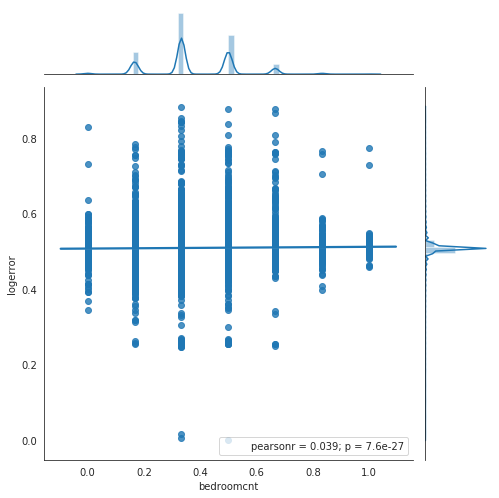

In [82]:
with sns.axes_style('white'):
    j = sns.jointplot('bedroomcnt', 'logerror', data=train, kind='reg', height=7);
    j.annotate(stats.pearsonr)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

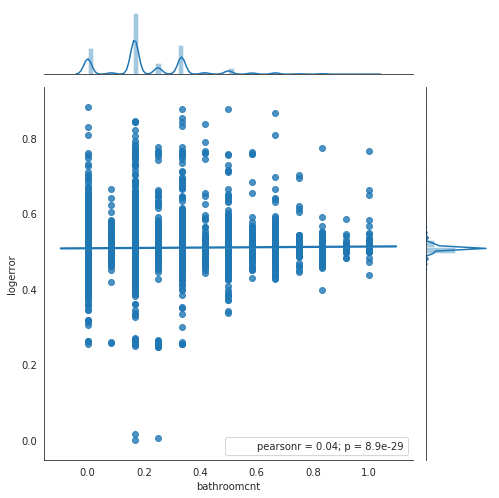

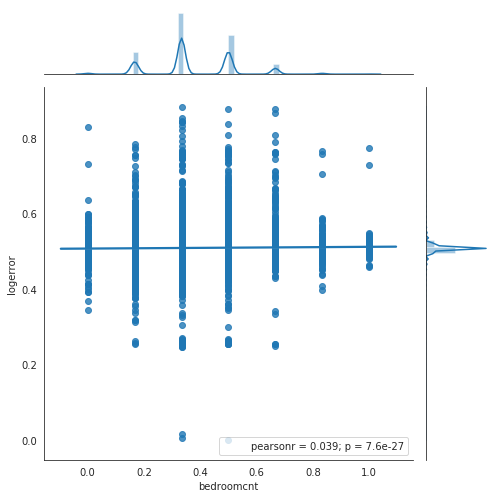

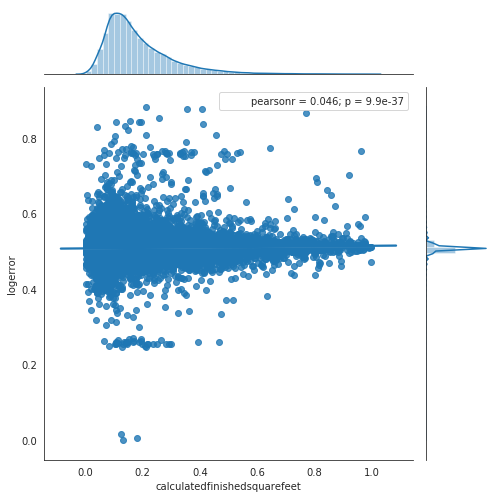

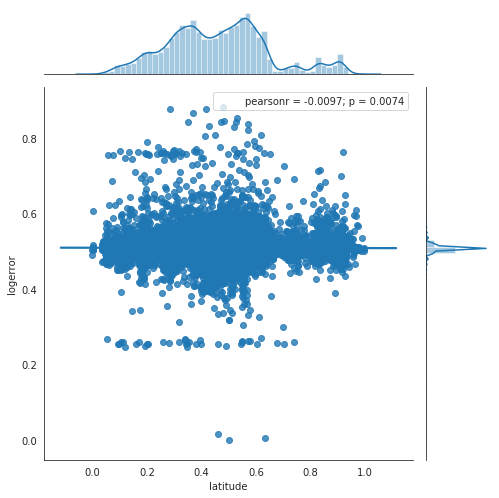

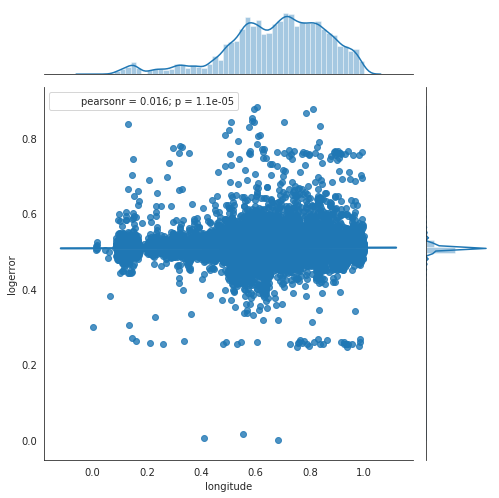

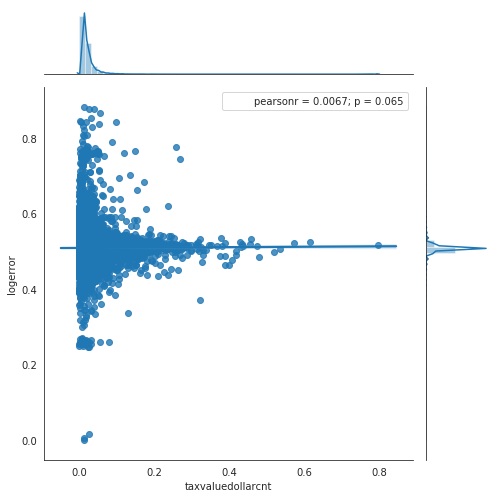

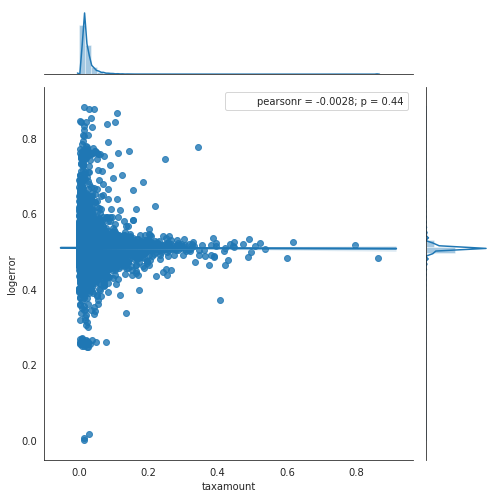

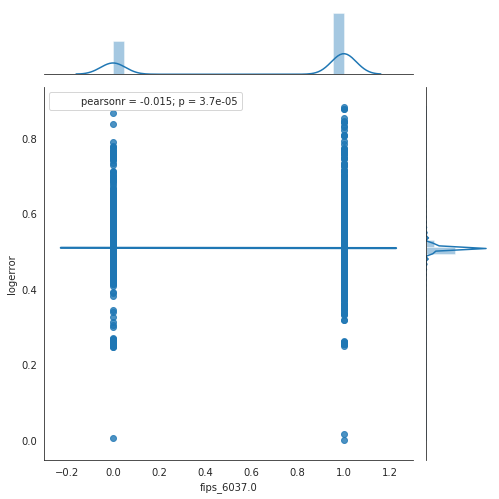

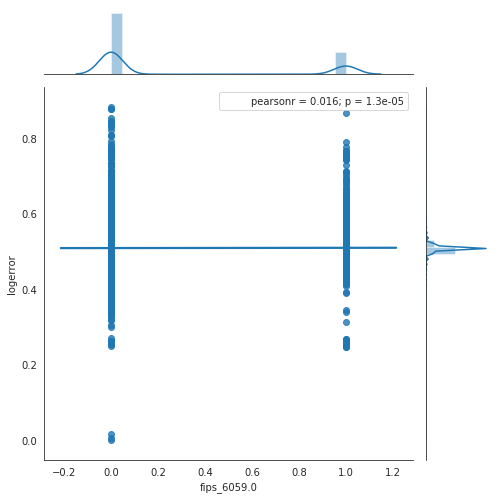

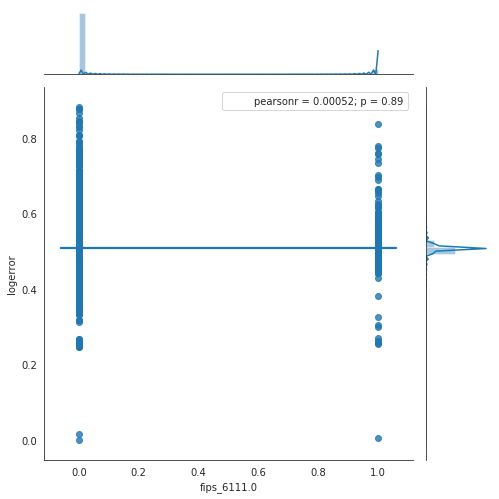

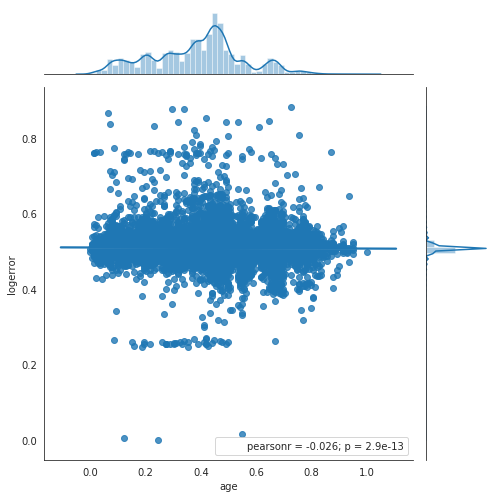

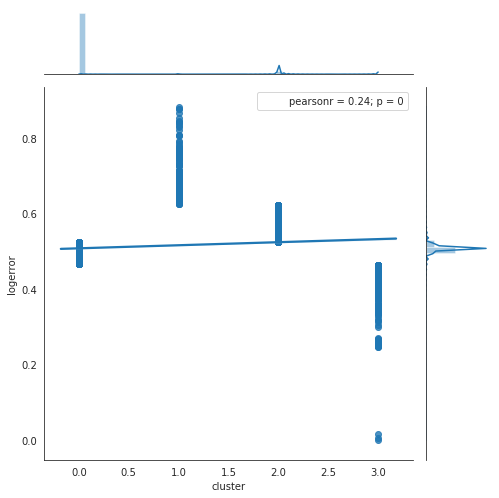

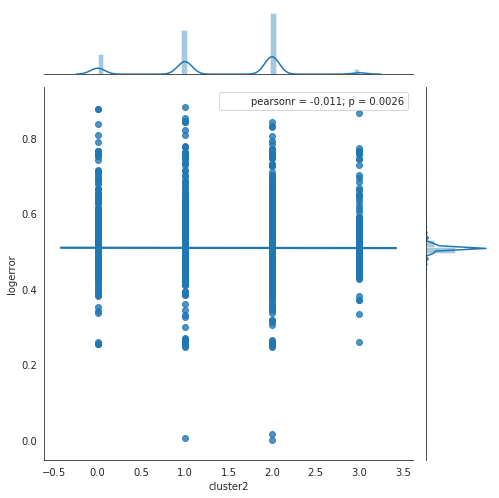

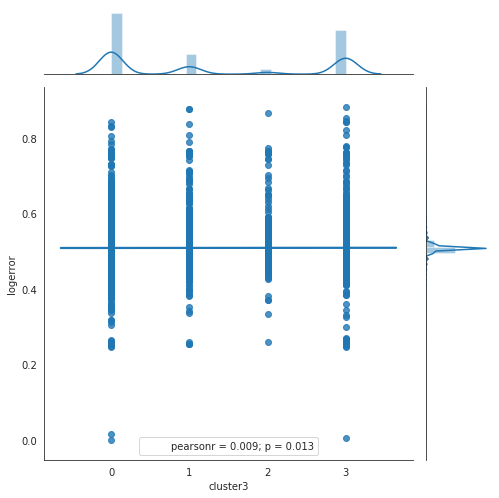

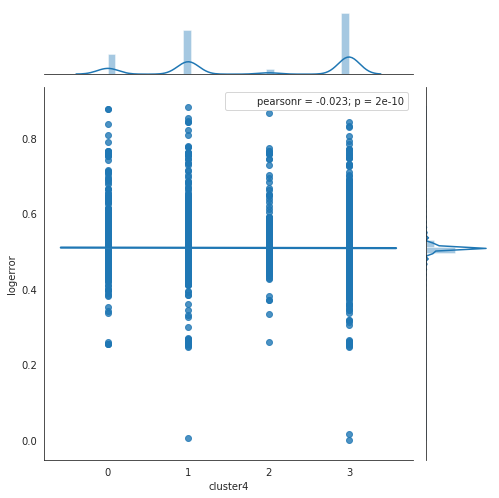

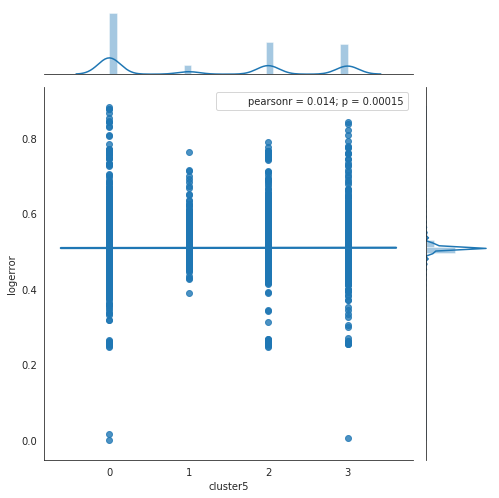

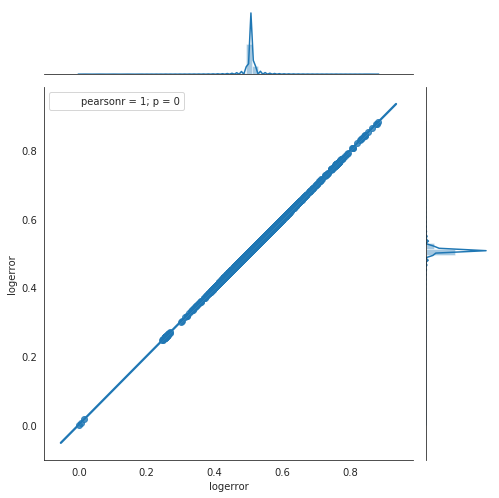

In [83]:
for i, col in enumerate(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
                         'latitude', 'longitude', 'taxvaluedollarcnt',
                         'taxamount',  'fips_6037.0', 'fips_6059.0',
                         'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5',
                         'logerror']):
    with sns.axes_style('white'):
            plot_number = i + 1
#             series = df_fixed[col]
            j = sns.jointplot(train[col], 'logerror', data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()

In [84]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.logerror) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'bathroomcnt': (0.040165786447859717, 8.853300933342516e-29),
 'bedroomcnt': (0.03871036325610761, 7.565108515854162e-27),
 'calculatedfinishedsquarefeet': (0.04567594971059305, 9.896688267293576e-37),
 'latitude': (-0.009673652656373313, 0.007365947891083935),
 'longitude': (0.01588403751389915, 1.0803740057851819e-05),
 'taxvaluedollarcnt': (0.006655187383333042, 0.06523832930390591),
 'taxamount': (-0.002800621660547658, 0.43785424288995967),
 'fips_6037.0': (-0.014900275757935805, 3.661532983876367e-05),
 'fips_6059.0': (0.015717303322756088, 1.3353455844853008e-05),
 'fips_6111.0': (0.0005184053469945344, 0.8858106705231253),
 'age': (-0.026341653497733316, 2.913049991820905e-13),
 'cluster': (0.23627819633652108, 0.0),
 'cluster2': (-0.01087160925800005, 0.002597796377580788),
 'cluster3': (0.00898966044196065, 0.012762079703873237),
 'cluster4': (-0.022949343669028514, 2.0413288372977939e-10),
 'cluster5': (0.013665942020795073, 0.00015316739829376289)}

In [85]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

#this is just like the regression print out / descriptive statistics thing in EXCEL

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     335.5
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        09:25:37   Log-Likelihood:             2.0177e+05
No. Observations:               76741   AIC:                        -4.035e+05
Df Residuals:                   76725   BIC:                        -4.034e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                      0.0012      0.001      1.515      0.130      -0.000       0.003
bedroomcnt                       0.0023      0.001      4.048      0.000       0.001       0.003
calculatedfinishedsquarefeet     0.0049      0.002      2.716      0.007       0.001       0.008
latitude                        -0.0012      0.001     -2.319      0.020      -0.002      -0.000
longitude                        0.0037      0.001      4.909      0.000       0.002       0.005
taxvaluedollarcnt                0.0709      0.010      6.836      0.000       0.051       0.091
taxamount                       -0.0959      0.010     -9.874      0.000      -0.115      -0.077
fips_6037.0                      0.5053      0.001    515.993      0.000       0.503       0.507
fips_6059.0                      0.5043      0.001    475.962      0.000       0.502       0.506
fips_6111.0                      0.5060      0.001    571.353      0.000       0.504       0.508
age                             -0.0023      0.001     -4.317      0.000      -0.003      -0.001
cluster                          0.0083      0.000     68.186      0.000       0.008       0.008
cluster2                         0.0004      0.001      0.724      0.469      -0.001       0.001
cluster3                        -0.0001      0.000     -0.916      0.359      -0.000       0.000
cluster4                        -0.0002      0.001     -0.430      0.668      -0.001       0.001
cluster5                         0.0003   7.69e-05      3.561      0.000       0.000       0.000
==============================================================================
Omnibus:                    33079.373   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         58294472.812
Skew:                           0.343   Prob(JB):                         0.00
Kurtosis:                     138.021   Cond. No.                         723.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Train & Test Model

#### Fit, predict (in-sample) & evaluate multiple models to find the best one.

Model Selection

Train at least 3 different models (a model is different if there are changes in one or more of the following: features, hyper-parameters, algorithm). Create object, fit, predict & evaluate.

##### Linear Regression Model 1

##### CREATE THE LINEAR REGRESSION OBJECT

In [86]:
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [87]:
lm1.fit(X_train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'cluster4']], y_train)
print(lm1)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.50689118]
[[ 0.01134436 -0.02630584  0.00025639]]


In [88]:
print('Multivariate - logerror = b + m1 * calculatedfinishedsquarefeet + m2 * taxvaluedollarcnt + m3 * cluster4')
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][2])

Multivariate - logerror = b + m1 * calculatedfinishedsquarefeet + m2 * taxvaluedollarcnt + m3 * cluster4
    y-intercept  (b): 0.51
    coefficient (m1): 0.01
    coefficient (m2): -0.03
    coefficient (m2): 0.00


In [89]:
y_pred_lm1 = lm1.predict(X_train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'cluster4']])

#### Performance metrics for the models: the mean squared error and r-squared values.  (from sklearn.mean_squared_error and sklearn.r2_score)

##### Mean Squared Error (MSE):

In [90]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 0.000324


##### R-squared values:

In [91]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the logerror e can be explained by the sq ft, tax valuation and cluster4.'.format(r2_lm1))

  0.29% of the variance in the logerror e can be explained by the sq ft, tax valuation and cluster4.


##### Linear Regression Model 2

In [92]:
lm2 = LinearRegression()
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [93]:
lm2.fit(X_train[['cluster4']], y_train)
print(lm2)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.50958187]
[[-0.00034934]]


In [94]:
print('Univariate - logerror = b + m1 * cluster4')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coefficients[0][0])

Univariate - logerror = b + m1 * cluster4
    y-intercept  (b): 0.51
    coefficient (m1): -0.00


In [95]:
# y_pred_lm2 = lm2.predict(X_train.drop(columns=['exam2']))

In [96]:
y_pred_lm2 = lm2.predict(X_train[['cluster4']])

In [97]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2))

lm2
  mse: 0.000325


In [98]:
r2_lm2 = r2_score(y_train, y_pred_lm2)

print('  {:.2%} of the variance in the logerror e can be explained by cluster4.'.format(r2_lm2))

  0.05% of the variance in the logerror e can be explained by cluster4.


##### Linear Regression Model 3

In [99]:
lm3 = LinearRegression()
print(lm3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [100]:
lm3.fit(X_train[['calculatedfinishedsquarefeet']], y_train)
print(lm3)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm3_y_intercept = lm3.intercept_
print(lm3_y_intercept)

lm3_coefficients = lm3.coef_
print(lm3_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.5076834]
[[0.00682657]]


In [101]:
print('Univariate - logerror = b + m1 * calculatedfinishedsquarefeet')
print('    y-intercept  (b): %.2f' % lm3_y_intercept)
print('    coefficient (m1): %.2f' % lm3_coefficients[0][0])

Univariate - logerror = b + m1 * calculatedfinishedsquarefeet
    y-intercept  (b): 0.51
    coefficient (m1): 0.01


In [102]:
y_pred_lm3 = lm3.predict(X_train[['calculatedfinishedsquarefeet']])

In [103]:
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3))

lm3
  mse: 0.000324


In [104]:
r2_lm3 = r2_score(y_train, y_pred_lm3)

print('  {:.2%} of the variance in the logerror e can be explained by calculatedfinishedsquarefeet.'.format(r2_lm3))

  0.21% of the variance in the logerror e can be explained by calculatedfinishedsquarefeet.


##### Linear Regression Model 4

In [105]:
lm4 = LinearRegression()
print(lm4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [106]:
lm4.fit(X_train[['latitude', 'longitude', 'cluster2']], y_train)
print(lm4)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm4_y_intercept = lm4.intercept_
print(lm4_y_intercept)

lm4_coefficients = lm4.coef_
print(lm4_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.5083765]
[[-0.00014834  0.00145239 -0.00024599]]


In [107]:
print('Multivariate - logerror = b + m1 * latitude + m2 * longitude + m3 * cluster2')
print('    y-intercept  (b): %.2f' % lm4_y_intercept)
print('    coefficient (m1): %.2f' % lm4_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm4_coefficients[0][1])
print('    coefficient (m2): %.2f' % lm4_coefficients[0][2])

Multivariate - logerror = b + m1 * latitude + m2 * longitude + m3 * cluster2
    y-intercept  (b): 0.51
    coefficient (m1): -0.00
    coefficient (m2): 0.00
    coefficient (m2): -0.00


In [108]:
y_pred_lm4 = lm4.predict(X_train[['latitude', 'longitude', 'cluster2']])

In [109]:
mse_lm4 = mean_squared_error(y_train, y_pred_lm4)
print("lm4\n  mse: {:.3}".format(mse_lm4))

lm4
  mse: 0.000325


In [110]:
r2_lm4 = r2_score(y_train, y_pred_lm4)

print('  {:.2%} of the variance in the logerror e can be explained by latitude, longitude, cluster2'.format(r2_lm4))

  0.04% of the variance in the logerror e can be explained by latitude, longitude, cluster2


##### COMPARE THE MODELS

Text(0.5, 1.0, 'Predicted vs Actual Logerror')

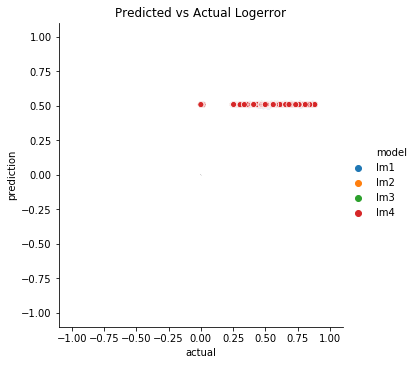

In [111]:
pd.DataFrame({'actual': y_train.logerror,
              'lm1': y_pred_lm1.ravel(),
              'lm2': y_pred_lm2.ravel(),
              'lm3': y_pred_lm3.ravel(),
              'lm4': y_pred_lm4.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([-.0005, .0005],[-.0005, .0005], c='black', ls=':')
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)
plt.title('Predicted vs Actual Logerror')

### Out-of-sample predictions using best model

In [112]:
# This makes predictions based on the model created above.
y_pred_lm1 = lm1.predict(X_test[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'cluster4']])

print('Predicted logerrors associated with y_pred_lm1:\n')
y_pred_lm1

Predicted logerrors associated with y_pred_lm1:



array([[0.50822924],
       [0.50884483],
       [0.50921395],
       ...,
       [0.50846786],
       [0.50871666],
       [0.50915832]])

In [113]:
print(y_pred_lm1.mean())

0.5089424501754216


Look at a couple performance metrics for our models: the mean squared error, median absolute error, and r-squared values.  (from sklearn.mean_squared_error and sklearn.r2_score)

##### Mean Squared Error (MSE):

In [114]:
mse_lm1 = mean_squared_error(y_test, y_pred_lm1)
print('lm1\n  mse: {:.3}'.format(mse_lm1))

lm1
  mse: 0.000334


##### Median Absolute Error (MAE):

In [151]:
mae_lm1 = median_absolute_error(y_test, y_pred_lm1)
print('lm1\n  mae: {:.3}'.format(mae_lm1))

lm1
  mae: 0.00365


##### R-squared values:

In [115]:
r2_lm1 = r2_score(y_test, y_pred_lm1)
print('  {:.2%} of the variance of the log error can be explained by the calculatedfinishedsquarefeet, taxvaluedollarcnt, cluster4'.format(r2_lm1))

  0.35% of the variance of the log error can be explained by the calculatedfinishedsquarefeet, taxvaluedollarcnt, cluster4


##### Plot Residuals:

Text(0, 0.5, 'Residuals')

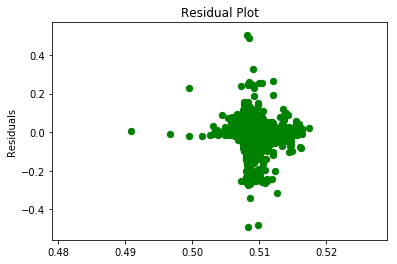

In [116]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
#plt.hlines(y=0, xmin=50, xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residuals')

##### Again, based on these results (but this time from the test data), I'd recommend not using any of these variables and start over with a new hypothesis and new variables.

In [117]:
from sklearn.feature_selection import f_regression

In [118]:
f_regression(X_test[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'cluster4']], y_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([49.28095072, 13.61602143, 23.20390174]),
 array([2.26102514e-12, 2.24625065e-04, 1.46349484e-06]))

'first array'  -  F: array, shape=(n_features,)
This is the: 'F values of features.'

'second array'  -  pval : array, shape=(n_features,)
This is the: 'p-values of F-scores.'

##### Project requirements completed.

### Now experimenting after initial pass-through.

Creating clusters for every independent variable

In [156]:
df_cluster_exp = df_zillow_total

In [158]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df_cluster_exp[['bathroomcnt']])
df_cluster_exp['cluster_bath'] = kmeans.predict(df_cluster_exp[['bathroomcnt']])

In [159]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df_cluster_exp[['bedroomcnt']])
df_cluster_exp['cluster_bed'] = kmeans.predict(df_cluster_exp[['bedroomcnt']])

In [160]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df_cluster_exp[['calculatedfinishedsquarefeet']])
df_cluster_exp['cluster_sqft'] = kmeans.predict(df_cluster_exp[['calculatedfinishedsquarefeet']])

In [161]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df_cluster_exp[['latitude']])
df_cluster_exp['cluster_latitude'] = kmeans.predict(df_cluster_exp[['latitude']])

In [162]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df_cluster_exp[['longitude']])
df_cluster_exp['cluster_longitude'] = kmeans.predict(df_cluster_exp[['longitude']])

In [164]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df_cluster_exp[['taxvaluedollarcnt']])
df_cluster_exp['cluster_tax_val'] = kmeans.predict(df_cluster_exp[['taxvaluedollarcnt']])

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df_cluster_exp[['taxamount']])
df_cluster_exp['cluster_tax'] = kmeans.predict(df_cluster_exp[['taxamount']])

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(df_cluster_exp[['age']])
df_cluster_exp['cluster_age'] = kmeans.predict(df_cluster_exp[['age']])

In [165]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(df_cluster_exp[['fips_6037.0']])
df_cluster_exp['cluster_fips_6037'] = kmeans.predict(df_cluster_exp[['fips_6037.0']])

In [166]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(df_cluster_exp[['fips_6059.0']])
df_cluster_exp['cluster_fips_6059'] = kmeans.predict(df_cluster_exp[['fips_6059.0']])

In [167]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(df_cluster_exp[['fips_6111.0']])
df_cluster_exp['cluster_fips_6111'] = kmeans.predict(df_cluster_exp[['fips_6111.0']])

In [171]:
df_cluster_exp.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'taxvaluedollarcnt', 'taxamount', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'logerror', 'cluster_bath', 'cluster_bed', 'cluster_sqft', 'cluster_latitude', 'cluster_longitude', 'cluster_', 'cluster_tax_val', 'cluster_fips_6037', 'cluster_fips_6059', 'cluster_fips_6111'], dtype='object')

### Modeling this new dataset with all indep. vars. clustered individually:

Train, test split:

In [172]:
X = df_cluster_exp.drop(['logerror'], axis=1)
y = df_cluster_exp[['logerror']]

X.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,taxvaluedollarcnt,taxamount,fips_6037.0,fips_6059.0,fips_6111.0,age,cluster,cluster2,cluster3,cluster4,cluster5,cluster_bath,cluster_bed,cluster_sqft,cluster_latitude,cluster_longitude,cluster_,cluster_tax_val,cluster_fips_6037,cluster_fips_6059,cluster_fips_6111
0,0.17,0.33,0.16,0.64,0.52,0.01,0.02,1,0,0,0.41,0,1,3,1,3,0,0,0,2,1,0,0,0,0,0
2,0.33,0.17,0.23,0.54,0.68,0.00,0.04,1,0,0,0.55,0,1,3,1,1,1,3,0,2,3,0,0,0,0,0
4,0.25,0.50,0.24,0.10,0.93,0.02,0.02,0,1,0,0.25,0,1,3,1,2,0,2,0,3,0,0,0,1,1,0
5,0.50,0.50,0.34,0.36,0.56,0.10,0.09,1,0,0,0.25,0,0,1,0,1,3,2,2,1,1,3,3,0,0,0
6,0.00,0.17,0.11,0.38,0.66,0.00,0.01,1,0,0,0.56,0,2,0,3,1,2,3,3,1,3,0,0,0,0,0


In [173]:
y.head()

,logerror
0,0.51
2,0.51
4,0.51
5,0.48
6,0.51


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'taxvaluedollarcnt', 'taxamount', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster_bath', 'cluster_bed', 'cluster_sqft', 'cluster_latitude', 'cluster_longitude', 'cluster_', 'cluster_tax_val', 'cluster_fips_6037', 'cluster_fips_6059', 'cluster_fips_6111', 'logerror']
Train dimensions (rows, columns): (76741, 27)


Test columns:  ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 'longitude', 'taxvaluedollarcnt', 'taxamount', 'fips_6037.0', 'fips_6059.0', 'fips_6111.0', 'age', 'cluster', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster_bath', 'cluster_bed', 'cluster_sqft', 'cluster_latitude', 'cluster_longitude', 'cluster_', 'cluster_tax_val', 'cluster_fips_6037', 'cluster_fips_6059', 'cluster_fips_6111', 'logerror']
Test dimensions (rows, columns): (32889, 27)


In [175]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.70
Test Split: 0.30


In [176]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.logerror) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'bathroomcnt': (0.040165786447859717, 8.853300933342516e-29),
 'bedroomcnt': (0.03871036325610761, 7.565108515854162e-27),
 'calculatedfinishedsquarefeet': (0.04567594971059305, 9.896688267293576e-37),
 'latitude': (-0.009673652656373313, 0.007365947891083935),
 'longitude': (0.01588403751389915, 1.0803740057851819e-05),
 'taxvaluedollarcnt': (0.006655187383333042, 0.06523832930390591),
 'taxamount': (-0.002800621660547658, 0.43785424288995967),
 'fips_6037.0': (-0.014900275757935805, 3.661532983876367e-05),
 'fips_6059.0': (0.015717303322756088, 1.3353455844853008e-05),
 'fips_6111.0': (0.0005184053469945344, 0.8858106705231253),
 'age': (-0.026341653497733316, 2.913049991820905e-13),
 'cluster': (0.23627819633652108, 0.0),
 'cluster2': (-0.01087160925800005, 0.002597796377580788),
 'cluster3': (0.00898966044196065, 0.012762079703873237),
 'cluster4': (-0.022949343669028514, 2.0413288372977939e-10),
 'cluster5': (0.010727205010507569, 0.0029615087129581663),
 'cluster_bath': (0.02056

In [179]:
ols_model = sm.OLS(y_train, X_train[['age','cluster_bath']])
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 2.262e+05
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:51:38   Log-Likelihood:                 16984.
No. Observations:               76741   AIC:                        -3.396e+04
Df Residuals:                   76739   BIC:                        -3.395e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age              1.0140      0.002    477.684      0.000       1.010       1.018
cluster_bath     0.0536      0.001     79.375      0.000       0.052       0.055
==============================================================================
Omnibus:                     1234.830   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1231.315
Skew:                          -0.289   Prob(JB):                    4.20e-268
Kurtosis:                       2.774   Cond. No.                         4.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
ols_model = sm.OLS(y_train, X_train[['cluster_','bedroomcnt','bathroomcnt', 'cluster_sqft']])
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 2.246e+05
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:04:40   Log-Likelihood:                 40445.
No. Observations:               76741   AIC:                        -8.088e+04
Df Residuals:                   76737   BIC:                        -8.085e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cluster_         0.0021      0.001      2.328      0.020       0.000       0.004
bedroomcnt       0.8653      0.003    269.088      0.000       0.859       0.872
bathroomcnt      0.0400      0.005      8.371      0.000       0.031       0.049
cluster_sqft     0.0740      0.000    229.483      0.000       0.073       0.075
==============================================================================
Omnibus:                      742.553   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.150
Skew:                          -0.223   Prob(JB):                    5.30e-171
Kurtosis:                       3.215   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Personal note re R^2:

Need:

R^2 greater than .5;

-  ie in one example, "92.1% of the variance in dependent variable is explained by the independent variable."



##### Also re Pearson's R:
"Pearson's R is __ with a significance p-value of __"


##### As a yardstick, REMEMBER:

- R square > .5 (or "50%"),

- F stat significance < 0.05

- p value < 0.05

If all true, this is a good fit and THESE RESULTS ARE RELIABLE.

### Train & Test Model - AGAIN

#### Fit, predict (in-sample) & evaluate multiple models to find the best one.

Model Selection

Train at least 3 different models (a model is different if there are changes in one or more of the following: features, hyper-parameters, algorithm). Create object, fit, predict & evaluate.

##### Linear Regression Model 4

##### CREATE THE LINEAR REGRESSION OBJECT

In [178]:
lm4 = LinearRegression()
print(lm4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [209]:
#lm4.fit(X_train[['cluster_','bedroomcnt','bathroomcnt', 'cluster_sqft']], y_train)
lm4.fit(X_train[['cluster_','bedroomcnt','bathroomcnt','cluster_sqft']], y_train)
print(lm4)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm4_y_intercept = lm4.intercept_
print(lm4_y_intercept)

lm4_coefficients = lm4.coef_
print(lm4_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[0.50700502]
[[-0.00052944  0.00258845  0.00447405  0.00011504]]


In [191]:
print('Multivariate - logerror = b + m1 * cluster_ + m2 * bedroomcnt + m3 * bathroomcnt + m4 * cluster_sqft')
print('    y-intercept  (b): %.2f' % lm4_y_intercept)
print('    coefficient (m1): %.2f' % lm4_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm4_coefficients[0][1])
print('    coefficient (m3): %.2f' % lm4_coefficients[0][2])
print('    coefficient (m4): %.2f' % lm4_coefficients[0][3])

Multivariate - logerror = b + m1 * cluster_ + m2 * bedroomcnt + m3 * bathroomcnt + m4 * cluster_sqft
    y-intercept  (b): 0.51
    coefficient (m1): -0.00
    coefficient (m2): 0.00
    coefficient (m3): 0.00
    coefficient (m4): 0.00


In [210]:
#y_pred_lm4 = lm4.predict(X_train[['cluster_','bedroomcnt','bathroomcnt', 'cluster_sqft']])
y_pred_lm4 = lm4.predict(X_train[['cluster_','bedroomcnt','bathroomcnt','cluster_sqft']])

#### Performance metrics for the models: the mean squared error and r-squared values.  (from sklearn.mean_squared_error and sklearn.r2_score)

##### Mean Squared Error (MSE):

In [211]:
mse_lm4 = mean_squared_error(y_train, y_pred_lm4)
print("lm4\n  mse: {:.3}".format(mse_lm4))

lm4
  mse: 0.000324


##### R-squared values:

In [212]:
r2_lm4 = r2_score(y_train, y_pred_lm4)

print('  {:.2%} of the variance in the logerror e can be explained by the cluster_age, bedroomcnt, bathroomcnt, cluster_sqft'.format(r2_lm4))

  0.23% of the variance in the logerror e can be explained by the cluster_age, bedroomcnt, bathroomcnt, cluster_sqft


In [222]:
# svclassifier1 = SVC(kernel='linear')
# svclassifier1.fit(X_train, y_train)

In [223]:
df_cluster_exp.info()

#### Maggie has good code in her example file, on how to do many of these things, drop certain NA's, fill certaain things, a good walkthrough.